# Craft a Story from a Dataset Exercise

1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is
about storytelling, not cleaning... :)
    - Dataset: Music & Mental Health Survey Results
    - Link to datset: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results?resource=download
2. Pick your audience: executive, technical, or non-technical; and adjust your tone
accordingly.
    - __
4. Take a look at the data: explore it.
5. Think of a narrative, and pursue it.
6. Give a 15 mins presentation to your mentor during your next call.

In your quest, you might need to ask a bunch of other questions, such as:
- Can I count something interesting?
- Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can I make a bar plot or a histogram?
- Can I compare two related quantities?
- Can I make a scatterplot?
- Can I make a time-series plot?
- Looking at the plots, what are some insights I can make?
- Can I see any correlations?
- Is there a hypothesis I can - and should - investigate further?
- What other questions are the insights leading me to ask?

Submission: Submit links to a GitHub repository containing a Jupyter Notebook or a
PowerPoint. The file should contain:
- The questions you asked
- The trends you investigated
- The resulting visualizations and conclusions

## About the dataset:
(From the kaggle source)

The MxMH dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health.

Block 0: Background

Respondents answer generic questions focused on musical background and listening habits.
Block 1: Music genres

Respondents rank how often they listen to 16 music genres, where they can select:

    Never
    Rarely
    Sometimes
    Very frequently

Block 2: Mental health

Respondents rank Anxiety, Depression, Insomnia, and OCD on a scale of 0 to 10, where:

    0 - I do not experience this.
    10 - I experience this regularly, constantly/or to an extreme.


## Column Descriptions

- Timestamp
    - Date and time when form was submitted
- Age
    - Respondent's age
- Primary streaming service
    - Respondent's primary streaming service
- Hours per day
    - Number of hours the respondent listens to music per day
- While working
    - Does the respondent listen to music while studying/working?
- Instrumentalist
    - Does the respondent play an instrument regularly?
- Composer
    - Does the respondent compose music?
- Fav genre
    - Respondent's favorite or top genre
- Exploratory
    - Does the respondent actively explore new artists/genres?
- Foreign languages
    - Does the respondent regularly listen to music with lyrics in a language they are not fluent in?
- BPM
    - Beats per minute of favorite genre
    - Interesting article on bpm limits: https://boilerroom.tv/article/extreme-bpms
- Frequency [...] (16 cols)
    - How frequently the respondent listens to ... music
- [Mental health] (4 cols)
    - self-reported scale of 0 to 10
-  Music effects
    - Does music improve/worsen respondent's mental health conditions?
- Permissions
    - Permissions to publicize data

# Imports

In [1]:
%matplotlib inline

#data manipulation and math

import numpy as np
import scipy as sp
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

#plotting and visualization

import matplotlib.pyplot as plt
import seaborn as sns

#Data Wrangling
from sklearn.impute import SimpleImputer

# Import the dataset

In [2]:
df_mxmh = pd.read_csv('mxmh_survey_results.csv')
df_mxmh.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## Edit col names to all lowercase & replace whitespace with underscore

In [3]:
df_mxmh.columns = df_mxmh.columns.str.lower()
print(df_mxmh.columns)

Index(['timestamp', 'age', 'primary streaming service', 'hours per day',
       'while working', 'instrumentalist', 'composer', 'fav genre',
       'exploratory', 'foreign languages', 'bpm', 'frequency [classical]',
       'frequency [country]', 'frequency [edm]', 'frequency [folk]',
       'frequency [gospel]', 'frequency [hip hop]', 'frequency [jazz]',
       'frequency [k pop]', 'frequency [latin]', 'frequency [lofi]',
       'frequency [metal]', 'frequency [pop]', 'frequency [r&b]',
       'frequency [rap]', 'frequency [rock]', 'frequency [video game music]',
       'anxiety', 'depression', 'insomnia', 'ocd', 'music effects',
       'permissions'],
      dtype='object')


In [4]:
df_mxmh.columns = df_mxmh.columns.str.replace(' ', '_')
print(df_mxmh.columns)

Index(['timestamp', 'age', 'primary_streaming_service', 'hours_per_day',
       'while_working', 'instrumentalist', 'composer', 'fav_genre',
       'exploratory', 'foreign_languages', 'bpm', 'frequency_[classical]',
       'frequency_[country]', 'frequency_[edm]', 'frequency_[folk]',
       'frequency_[gospel]', 'frequency_[hip_hop]', 'frequency_[jazz]',
       'frequency_[k_pop]', 'frequency_[latin]', 'frequency_[lofi]',
       'frequency_[metal]', 'frequency_[pop]', 'frequency_[r&b]',
       'frequency_[rap]', 'frequency_[rock]', 'frequency_[video_game_music]',
       'anxiety', 'depression', 'insomnia', 'ocd', 'music_effects',
       'permissions'],
      dtype='object')


## Explore the dataframe

In [5]:
print(df_mxmh.info())
print('\n')
print(f'shape:\n{df_mxmh.shape[1]} columns\n{df_mxmh.shape[0]} rows')
print('\n')
print('Count of unique values per column:')
print(df_mxmh.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     736 non-null    object 
 1   age                           735 non-null    float64
 2   primary_streaming_service     735 non-null    object 
 3   hours_per_day                 736 non-null    float64
 4   while_working                 733 non-null    object 
 5   instrumentalist               732 non-null    object 
 6   composer                      735 non-null    object 
 7   fav_genre                     736 non-null    object 
 8   exploratory                   736 non-null    object 
 9   foreign_languages             732 non-null    object 
 10  bpm                           629 non-null    float64
 11  frequency_[classical]         736 non-null    object 
 12  frequency_[country]           736 non-null    object 
 13  frequ

# Wrangling

## Outlier detection
- Box plots

<Axes: >

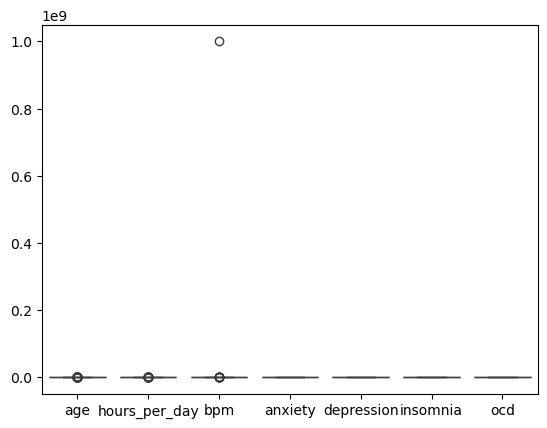

In [6]:
sns.boxplot(df_mxmh)

BPM seems to have an extreme outlier

In [7]:
df_mxmh['bpm'].value_counts(dropna=False).sort_index(ascending=False)

bpm
999999999.0      1
624.0            1
220.0            2
218.0            1
210.0            2
208.0            1
204.0            1
200.0            7
194.0            2
193.0            1
192.0            1
191.0            1
190.0            1
189.0            1
186.0            1
185.0            2
183.0            1
181.0            1
180.0           10
179.0            1
178.0            3
175.0            1
174.0            8
173.0            1
172.0            3
171.0            6
170.0            5
169.0            3
168.0            1
167.0            1
166.0            1
165.0            3
164.0            1
163.0            2
162.0            3
161.0            4
160.0           10
159.0            1
158.0            4
157.0            2
156.0            7
155.0            5
153.0            1
150.0           18
149.0            3
148.0            6
147.0            5
146.0            3
145.0            5
144.0            4
143.0            3
142.0            1
141.0   

Looks like 2 outliers for bpm (999999999.0 & 624.0)

That bpm 999999999.0 is possible but so exceedingly rare and would not be the bpm of a whole genre and the 624.0 is improbable, double checking the rows where these values occur

In [8]:
df_mxmh[df_mxmh['bpm']==999999999.0]

,timestamp,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects,permissions
568,9/4/2022 15:41:59,16.0,Spotify,7.0,Yes,No,No,Video game music,Yes,No,999999999.0,Never,Rarely,Sometimes,Rarely,Never,Rarely,Rarely,Never,Never,Never,Very frequently,Sometimes,Never,Very frequently,Rarely,Sometimes,4.0,8.0,8.0,4.0,No effect,I understand.


Row 568 contains the impossible outlier, need to decide what to do with it.

Opting to impute the mean of the genre (video game music)

In [9]:
#Gives mean of the bpm for video game music genre
    #gives warning when using to replace value for outlier since changing the same row I'd be dropping in the calculation
print('long calc for bpm for video game music:', df_mxmh[df_mxmh["fav_genre"]=='Video game music'].drop(index=568).bpm.mean())

long calc for bpm for video game music: 119.75


In [10]:
df_mxmh.loc[568, 'bpm'] = df_mxmh[df_mxmh["fav_genre"]=='Video game music'].drop(index=568).bpm.mean()
print(df_mxmh.loc[568])

timestamp                       9/4/2022 15:41:59
age                                          16.0
primary_streaming_service                 Spotify
hours_per_day                                 7.0
while_working                                 Yes
instrumentalist                                No
composer                                       No
fav_genre                        Video game music
exploratory                                   Yes
foreign_languages                              No
bpm                                        119.75
frequency_[classical]                       Never
frequency_[country]                        Rarely
frequency_[edm]                         Sometimes
frequency_[folk]                           Rarely
frequency_[gospel]                          Never
frequency_[hip_hop]                        Rarely
frequency_[jazz]                           Rarely
frequency_[k_pop]                           Never
frequency_[latin]                           Never


In [11]:
df_mxmh[df_mxmh['bpm'] == 624.0]

,timestamp,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects,permissions
644,9/13/2022 1:55:43,16.0,Other streaming service,4.0,Yes,No,No,EDM,Yes,Yes,624.0,Sometimes,Never,Very frequently,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Sometimes,4.0,7.0,1.0,3.0,Improve,I understand.


In [12]:
# mean of edm bpm excluding the outlier

df_mxmh[df_mxmh["fav_genre"]=='EDM'].drop(644).bpm.mean()

133.88571428571427

The mean is strong evidence that a bpm of 624.0 (even for EDM is too high)

It's not impossible but as a bpm for the genre, it is an outlier

In [13]:
# Replacing the other outlier in bpm
df_mxmh.loc[644, 'bpm'] = df_mxmh[df_mxmh["fav_genre"]=='EDM'].drop(index=644).bpm.mean()
print(df_mxmh.loc[644])

timestamp                             9/13/2022 1:55:43
age                                                16.0
primary_streaming_service       Other streaming service
hours_per_day                                       4.0
while_working                                       Yes
instrumentalist                                      No
composer                                             No
fav_genre                                           EDM
exploratory                                         Yes
foreign_languages                                   Yes
bpm                                          133.885714
frequency_[classical]                         Sometimes
frequency_[country]                               Never
frequency_[edm]                         Very frequently
frequency_[folk]                                  Never
frequency_[gospel]                                Never
frequency_[hip_hop]                               Never
frequency_[jazz]                                

<Axes: >

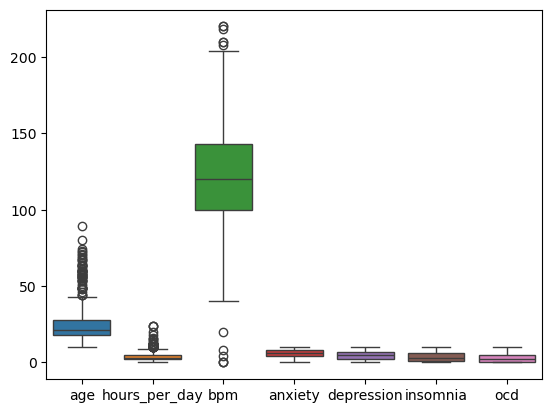

In [14]:
sns.boxplot(df_mxmh)

No more horrible outliers

## Null values

In [15]:
#total nulls

df_mxmh.isnull().sum().sum()

129

Only 129 total nulls (could have multiple nulls in same row), worth it to just drop them?

In [16]:
#total number of rows with any null
len(df_mxmh) - len(df_mxmh.dropna())

120

In [17]:
#Total rows check (what % are the nulls of the whole dataset)

print('# of rows:', len(df_mxmh.index))
print('# of null rows:', len(df_mxmh) - len(df_mxmh.dropna()))
print('% of null rows:', round(((len(df_mxmh) - len(df_mxmh.dropna())) / len(df_mxmh.index))*100, 2), '%')

# of rows: 736
# of null rows: 120
% of null rows: 16.3 %


In [18]:
#nulls per column
df_mxmh.isnull().sum().sort_values(ascending=False)

bpm                             107
music_effects                     8
instrumentalist                   4
foreign_languages                 4
while_working                     3
primary_streaming_service         1
composer                          1
age                               1
frequency_[video_game_music]      0
frequency_[pop]                   0
frequency_[r&b]                   0
frequency_[rap]                   0
frequency_[rock]                  0
timestamp                         0
anxiety                           0
depression                        0
frequency_[lofi]                  0
insomnia                          0
ocd                               0
frequency_[metal]                 0
frequency_[hip_hop]               0
frequency_[latin]                 0
frequency_[k_pop]                 0
frequency_[jazz]                  0
frequency_[gospel]                0
frequency_[folk]                  0
frequency_[edm]                   0
frequency_[country]         

### Null plan:
Drop all rows with null except for 'bpm' column.
'bpm' column nulls will get imputed with the mean of bpm for the 'fav_genre' listed in the row

#### Impute for BPM column

In [19]:
#looking at mean & other descriptive stats of bpm per fav_genre
df_mxmh.groupby(by='fav_genre', dropna=False)['bpm'].describe().T

fav_genre,Classical,Country,EDM,Folk,Gospel,Hip hop,Jazz,K pop,Latin,Lofi,Metal,Pop,R&B,Rap,Rock,Video game music
count,40.000000,21.000000,36.000000,26.000000,4.000000,32.000000,19.000000,25.000000,3.000000,10.000000,78.000000,97.000000,30.000000,20.00000,151.000000,37.000000
mean,114.575000,110.190476,133.885714,109.538462,89.250000,111.906250,124.473684,128.560000,133.666667,114.300000,139.102564,118.907216,114.166667,127.10000,124.052980,119.750000
std,34.081266,18.386460,28.371788,36.666312,72.513792,34.360855,36.925403,28.583328,53.144457,34.396544,42.050245,28.231219,35.359321,24.36758,31.057321,32.300133
min,40.000000,85.000000,85.000000,0.000000,8.000000,20.000000,81.000000,80.000000,73.000000,79.000000,0.000000,60.000000,4.000000,73.00000,52.000000,60.000000
25%,94.250000,103.000000,120.000000,92.000000,44.000000,88.000000,91.500000,110.000000,114.500000,86.500000,112.500000,101.000000,90.000000,114.25000,103.500000,95.000000
50%,117.500000,109.000000,130.942857,114.500000,87.500000,111.500000,120.000000,124.000000,156.000000,104.500000,140.000000,120.000000,115.500000,130.50000,120.000000,119.750000
75%,132.750000,119.000000,151.500000,130.000000,132.750000,133.250000,144.000000,145.000000,164.000000,135.750000,164.000000,134.000000,144.500000,140.75000,141.000000,143.000000
max,181.000000,163.000000,200.000000,186.000000,174.000000,178.000000,200.000000,204.000000,172.000000,174.000000,220.000000,208.000000,169.000000,170.00000,220.000000,180.000000


#Code-Cell -converted to markdown cell since this code not needed anymore, keeping for looking back at examples of what I tried

#AP: Made two lists of the fav_genre values and the mean bpm for each genre

fav_genre_list = list(df_mxmh['fav_genre'].unique())
print(fav_genre_list)

means_genres = []
for g in fav_genre_list:
    means_genres.append(df_mxmh[df_mxmh['fav_genre'] == g].bpm.mean())
print(means_genres)

#AP: Made a dict of the two genre & mean bpms lFileExistsError

genre_bpm = dict(zip(fav_genre_list, means_genres))
print(genre_bpm)

____
#Code-Cell -converted to markdown cell since this code not needed anymore, keeping for looking back at examples of what I tried

#AP: fillna per fav_genre in bpm column

for g, b in genre_bpm.items():
        #mean_bpm = df_mxmh[df_mxmh['fav_genre'] == g].bpm.mean()
        #df_mxmh[df_mxmh['fav_genre'] == g].bpm.fillna(value = b, inplace=True)
        df_mxmh[df_mxmh['fav_genre'] == g].bpm.replace(to_replace = 'NaN', value = b, inplace=True)

df_mxmh.isnull().sum().sort_values(ascending=False)

In [20]:
#Calculate mean BPM for each genre

genre_means = df_mxmh.groupby('fav_genre')['bpm'].mean()
genre_means

fav_genre
Classical           114.575000
Country             110.190476
EDM                 133.885714
Folk                109.538462
Gospel               89.250000
Hip hop             111.906250
Jazz                124.473684
K pop               128.560000
Latin               133.666667
Lofi                114.300000
Metal               139.102564
Pop                 118.907216
R&B                 114.166667
Rap                 127.100000
Rock                124.052980
Video game music    119.750000
Name: bpm, dtype: float64

In [21]:
#Define a function to impute null values based on the mean of each genre

def impute_bpm(row):
    if pd.isnull(row['bpm']):
        return genre_means[row['fav_genre']]
    else:
        return row['bpm']

In [22]:
#Apply the function to the DataFrame

df_mxmh['bpm'] = df_mxmh.apply(impute_bpm, axis=1)
df_mxmh

,timestamp,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects,permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.00,Yes,Yes,Yes,Latin,Yes,Yes,156.000000,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.50,Yes,No,No,Rock,Yes,No,119.000000,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.00,No,No,No,Video game music,No,Yes,132.000000,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.50,Yes,No,Yes,Jazz,Yes,Yes,84.000000,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.00,Yes,No,No,R&B,Yes,No,107.000000,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.00,Yes,Yes,Yes,Jazz,Yes,Yes,86.000000,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,Very frequently,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.00,Yes,Yes,No,Video game music,Yes,Yes,66.000000,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
7,8/27/2022 22:18:59,21.0,Spotify,1.00,Yes,No,No,K pop,Yes,Yes,95.000000,Never,Never,Rarely,Never,Never,Very frequently,Rarely,Very frequently,Never,Sometimes,Never,Sometimes,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.
8,8/27/2022 22:33:05,19.0,Spotify,6.00,Yes,No,No,Rock,No,No,94.000000,Never,Very frequently,Never,Sometimes,Never,Never,Never,Never,Never,Never,Very frequently,Never,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve,I understand.
9,8/27/2022 22:44:03,18.0,I do not use a streaming service.,1.00,Yes,No,No,R&B,Yes,Yes,155.000000,Rarely,Rarely,Rarely,Rarely,Sometimes,Rarely,Rarely,Never,Rarely,Rarely,Never,Sometimes,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve,I understand.


In [23]:
print('# of rows:', len(df_mxmh.index))
print('# of null rows:', len(df_mxmh) - len(df_mxmh.dropna()))
print('% of null rows:', round(((len(df_mxmh) - len(df_mxmh.dropna())) / len(df_mxmh.index))*100, 2), '%')

df_mxmh.isnull().sum().sort_values(ascending=False)

# of rows: 736
# of null rows: 18
% of null rows: 2.45 %


music_effects                   8
foreign_languages               4
instrumentalist                 4
while_working                   3
primary_streaming_service       1
composer                        1
age                             1
frequency_[video_game_music]    0
frequency_[pop]                 0
frequency_[r&b]                 0
frequency_[rap]                 0
frequency_[rock]                0
timestamp                       0
anxiety                         0
depression                      0
frequency_[lofi]                0
insomnia                        0
ocd                             0
frequency_[metal]               0
frequency_[hip_hop]             0
frequency_[latin]               0
frequency_[k_pop]               0
frequency_[jazz]                0
frequency_[gospel]              0
frequency_[folk]                0
frequency_[edm]                 0
frequency_[country]             0
frequency_[classical]           0
bpm                             0
exploratory   

#### Drop all rows with any amount of nulls
    Should be only 18 rows after imputing BPM col
    Since this is simply a data storytelling exercise, strict data wrangling and investigation of the nulls is not required since rows with nulls are <3% of total rows

In [24]:
#AP: drop all rows with nulls, and reset index

print('df before shape:', df_mxmh.shape)

df_mxmh.dropna(axis=0, how='any', inplace=True, ignore_index=True)

print('df after shape:', df_mxmh.shape)

df before shape: (736, 33)
df after shape: (718, 33)


AP: Now the dataframe is ready for analysis & storytelling

## Convert strings to numerical
    'No'/'Yes' to 0/1
    Rankings to appropriate numerical ranges
    Other categorical values unchanged (i.e fav_genre col)
        Leaving music_effects alone since 3 response values ('Improve', 'No effect', 'Worsen')

In [25]:
df_mxmh.head()

,timestamp,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects,permissions
0,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
2,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,Rarely,Sometimes,Never,Never,Never,Sometimes,Very frequently,Very frequently,Rarely,Very frequently,Rarely,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
4,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,Sometimes,Never,Rarely,Sometimes,Rarely,Rarely,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [26]:
#AP: see which cols are strings

df_mxmh.dtypes

timestamp                        object
age                             float64
primary_streaming_service        object
hours_per_day                   float64
while_working                    object
instrumentalist                  object
composer                         object
fav_genre                        object
exploratory                      object
foreign_languages                object
bpm                             float64
frequency_[classical]            object
frequency_[country]              object
frequency_[edm]                  object
frequency_[folk]                 object
frequency_[gospel]               object
frequency_[hip_hop]              object
frequency_[jazz]                 object
frequency_[k_pop]                object
frequency_[latin]                object
frequency_[lofi]                 object
frequency_[metal]                object
frequency_[pop]                  object
frequency_[r&b]                  object
frequency_[rap]                  object


In [27]:
#AP: return col names of the object dtype

df_mxmh.select_dtypes('object').columns

Index(['timestamp', 'primary_streaming_service', 'while_working',
       'instrumentalist', 'composer', 'fav_genre', 'exploratory',
       'foreign_languages', 'frequency_[classical]', 'frequency_[country]',
       'frequency_[edm]', 'frequency_[folk]', 'frequency_[gospel]',
       'frequency_[hip_hop]', 'frequency_[jazz]', 'frequency_[k_pop]',
       'frequency_[latin]', 'frequency_[lofi]', 'frequency_[metal]',
       'frequency_[pop]', 'frequency_[r&b]', 'frequency_[rap]',
       'frequency_[rock]', 'frequency_[video_game_music]', 'music_effects',
       'permissions'],
      dtype='object')

In [28]:
#AP: make lists of the cols to replace the str values with numerical equivalents
    #& dicts of the mappings of the str values to their numerical equivalents


#cols with binary choice
cols_YN = ['while_working', 'instrumentalist', 'composer', 'exploratory', 'foreign_languages']

yn_vals_dict = {'Yes' : 1, 'No': 0}


### Yes/No Conversion

In [29]:
print('Before YN replace:')
print(df_mxmh[cols_YN].sample(3, random_state=10))

#make the replacement
df_mxmh.replace(yn_vals_dict, inplace=True)

print('\n')

print('After YN replace:')
print(df_mxmh[cols_YN].sample(3, random_state=10))

Before YN replace:
    while_working instrumentalist composer exploratory foreign_languages
579           Yes              No       No         Yes                No
441            No             Yes       No          No               Yes
341           Yes              No       No         Yes               Yes


After YN replace:
     while_working  instrumentalist  composer  exploratory  foreign_languages
579              1                0         0            1                  0
441              0                1         0            0                  1
341              1                0         0            1                  1


C:\Users\apez9\AppData\Local\Temp\ipykernel_11900\1871744696.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mxmh.replace(yn_vals_dict, inplace=True)


### Frequency Rank Conversion

In [30]:
#cols with 4 ranks
cols_rank4 = ['frequency_[classical]', 'frequency_[country]', 'frequency_[edm]', 'frequency_[folk]',
              'frequency_[gospel]', 'frequency_[hip_hop]', 'frequency_[jazz]', 'frequency_[k_pop]',
              'frequency_[latin]', 'frequency_[lofi]', 'frequency_[metal]', 'frequency_[pop]',
              'frequency_[r&b]', 'frequency_[rap]', 'frequency_[rock]', 'frequency_[video_game_music]']

rank4_vals_dict = {'Never':0, 'Rarely':1, 'Sometimes':2, 'Very frequently':3}

In [31]:
print('Before Freq replace:')
df_mxmh[cols_rank4].sample(3, random_state=10)

Before Freq replace:


,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music]
579,Never,Never,Never,Rarely,Never,Sometimes,Never,Never,Never,Never,Sometimes,Rarely,Rarely,Sometimes,Very frequently,Sometimes
441,Rarely,Rarely,Never,Sometimes,Never,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Very frequently,Never
341,Rarely,Sometimes,Sometimes,Never,Never,Rarely,Rarely,Very frequently,Rarely,Never,Never,Very frequently,Very frequently,Rarely,Rarely,Rarely


In [32]:
#make the replacement
df_mxmh.replace(rank4_vals_dict, inplace=True)

print('After Freq replace:')
df_mxmh[cols_rank4].sample(3, random_state=10)

After Freq replace:


C:\Users\apez9\AppData\Local\Temp\ipykernel_11900\2184057619.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mxmh.replace(rank4_vals_dict, inplace=True)


,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music]
579,0,0,0,1,0,2,0,0,0,0,2,1,1,2,3,2
441,1,1,0,2,0,0,0,0,0,0,1,0,0,0,3,0
341,1,2,2,0,0,1,1,3,1,0,0,3,3,1,1,1


### Not converting 'Music effects' col

## Drop unnecessary cols
    timestamp & permissions

In [33]:
df_mxmh.drop(['timestamp', 'permissions'], axis=1, inplace=True)
df_mxmh.columns

Index(['age', 'primary_streaming_service', 'hours_per_day', 'while_working',
       'instrumentalist', 'composer', 'fav_genre', 'exploratory',
       'foreign_languages', 'bpm', 'frequency_[classical]',
       'frequency_[country]', 'frequency_[edm]', 'frequency_[folk]',
       'frequency_[gospel]', 'frequency_[hip_hop]', 'frequency_[jazz]',
       'frequency_[k_pop]', 'frequency_[latin]', 'frequency_[lofi]',
       'frequency_[metal]', 'frequency_[pop]', 'frequency_[r&b]',
       'frequency_[rap]', 'frequency_[rock]', 'frequency_[video_game_music]',
       'anxiety', 'depression', 'insomnia', 'ocd', 'music_effects'],
      dtype='object')

# EDA

In [34]:
df_mxmh.sample(8)

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,frequency_[classical],frequency_[country],frequency_[edm],frequency_[folk],frequency_[gospel],frequency_[hip_hop],frequency_[jazz],frequency_[k_pop],frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects
40,17.0,Spotify,3.0,1,0,0,Classical,1,1,120.00000,3,0,3,0,0,3,2,2,1,2,0,2,3,3,1,2,6.0,6.0,8.0,2.0,Improve
1,61.0,YouTube Music,2.5,1,0,1,Jazz,1,1,84.00000,2,0,0,1,2,0,3,2,3,2,0,2,2,0,0,0,9.0,7.0,3.0,3.0,Improve
101,21.0,YouTube Music,2.0,1,1,0,Metal,1,1,107.00000,2,1,0,3,0,0,1,0,0,1,3,1,0,1,2,3,8.0,4.0,10.0,0.0,No effect
301,49.0,Spotify,2.0,1,0,0,Folk,1,0,147.00000,1,1,2,3,0,2,1,0,0,2,1,2,2,2,1,1,0.0,0.0,2.0,0.0,No effect
71,16.0,Spotify,5.0,1,1,1,Jazz,1,1,167.00000,2,1,0,0,1,1,3,3,1,0,0,3,1,3,2,0,7.0,7.0,8.0,4.0,Improve
557,18.0,Spotify,4.0,1,1,0,R&B,1,1,169.00000,1,2,3,0,1,3,1,2,2,2,1,2,3,2,1,2,3.0,0.0,3.0,4.0,Improve
61,36.0,Spotify,6.0,1,0,0,Metal,1,1,174.00000,3,0,1,3,0,0,0,2,0,1,3,1,0,0,2,3,5.0,4.0,10.0,2.0,Improve
281,27.0,Spotify,20.0,1,0,0,Rock,1,1,124.05298,2,1,2,1,0,1,0,2,1,2,3,1,0,1,3,2,8.0,10.0,10.0,8.0,No effect


## Distributions

Quick distributions of the numerical columns

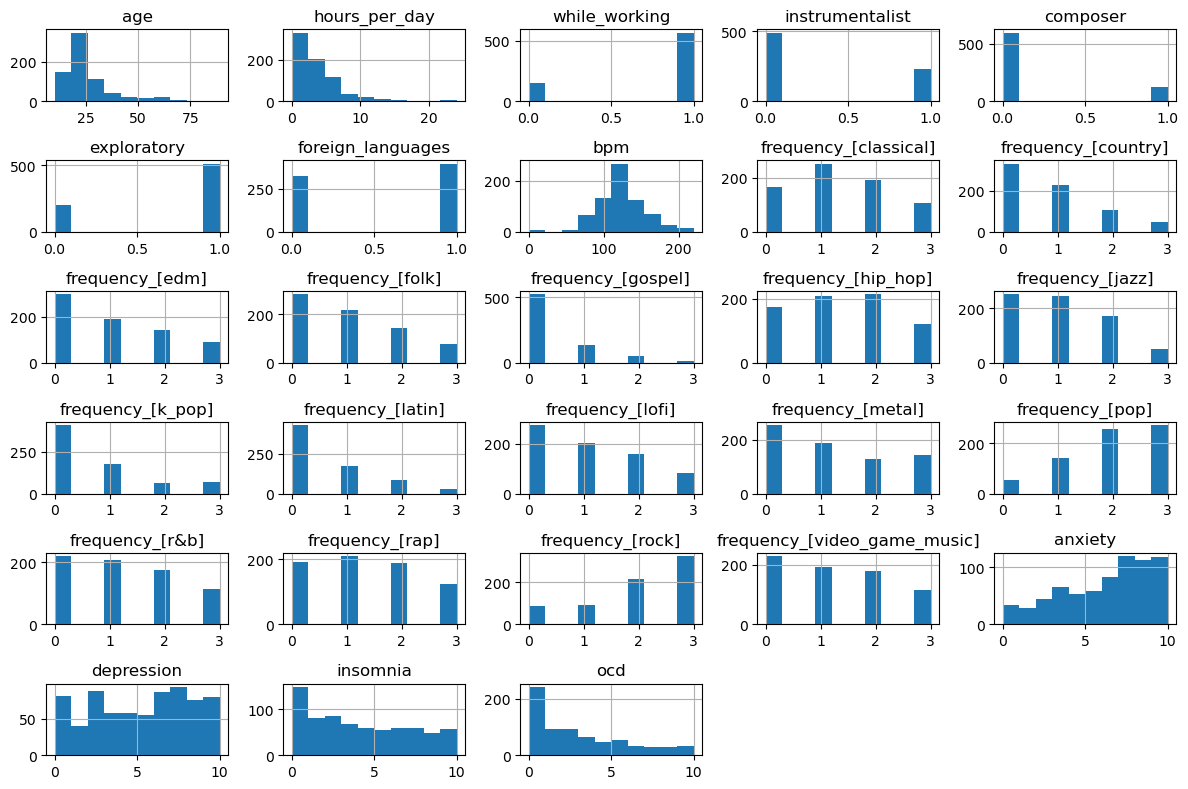

In [35]:
df_mxmh.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

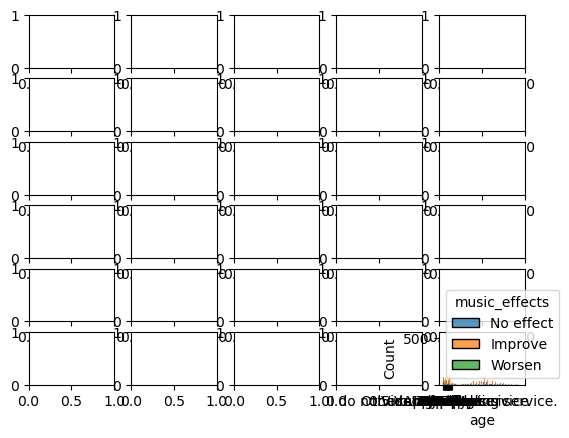

In [36]:
fig, axs = plt.subplots(nrows=6, ncols=5)

for col in df_mxmh.columns:
    sns.histplot(data=df_mxmh, x=df_mxmh[col], kde=False, bins='auto', hue='music_effects', multiple='dodge')


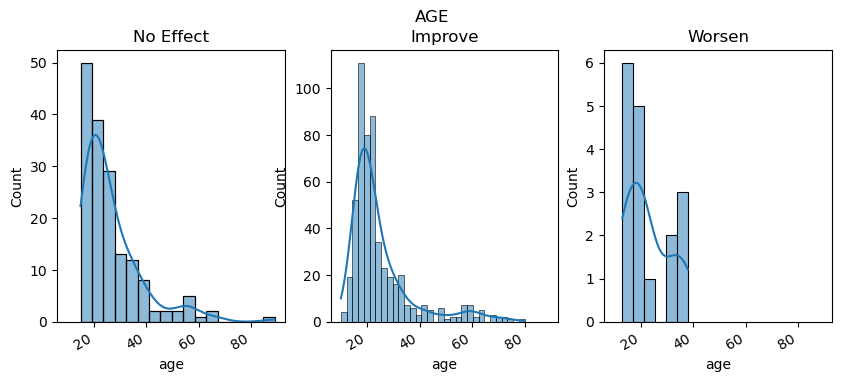

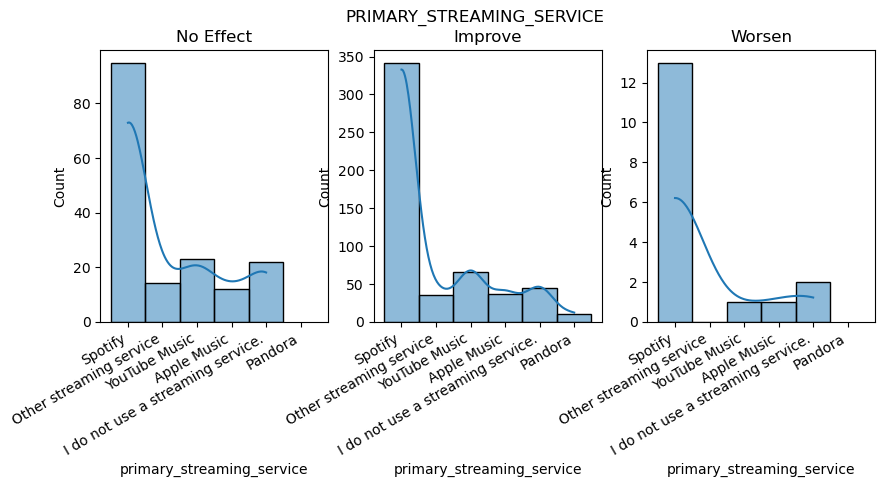

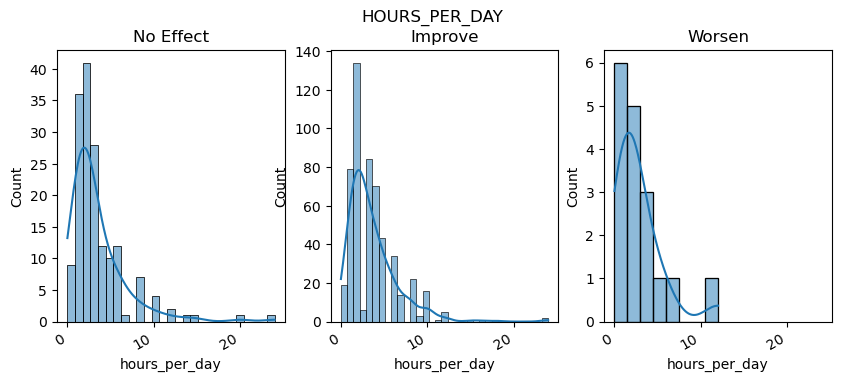

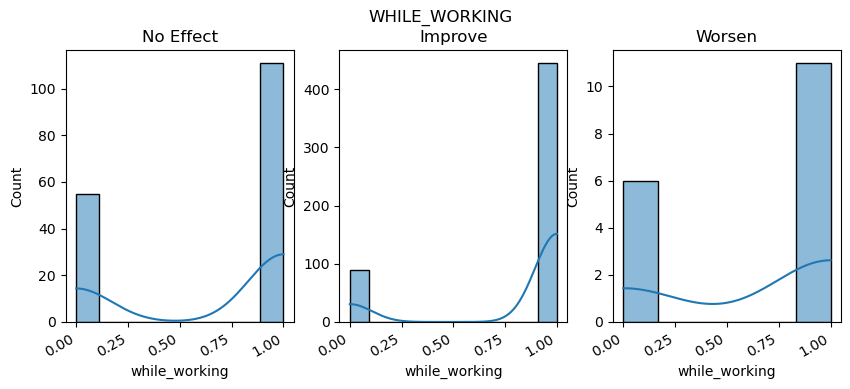

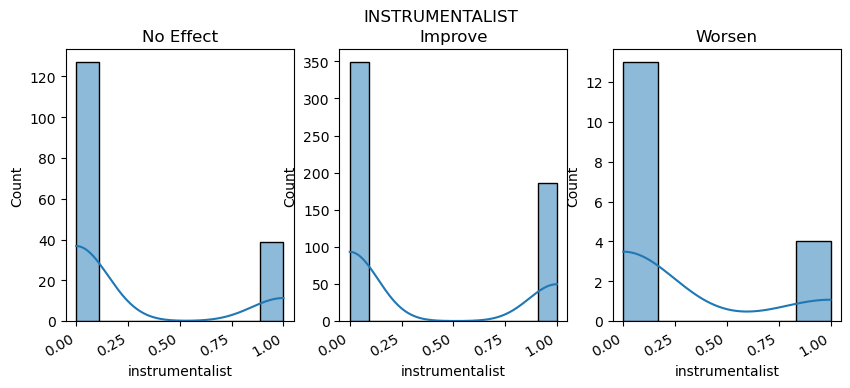

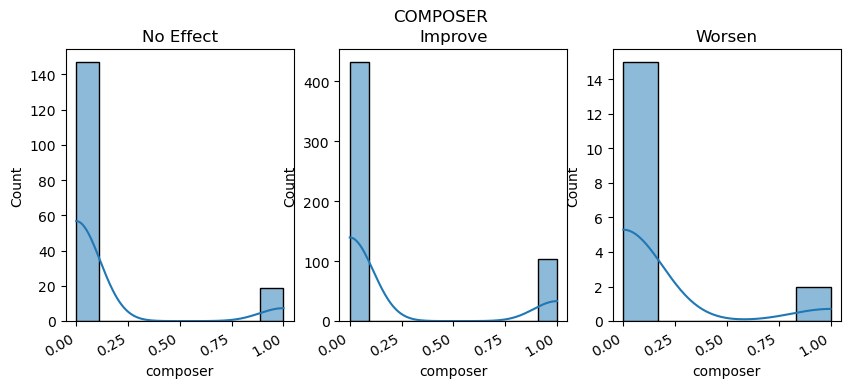

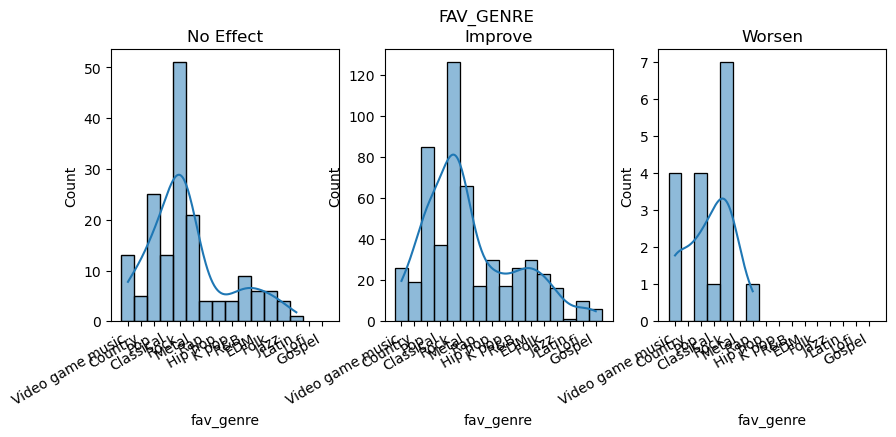

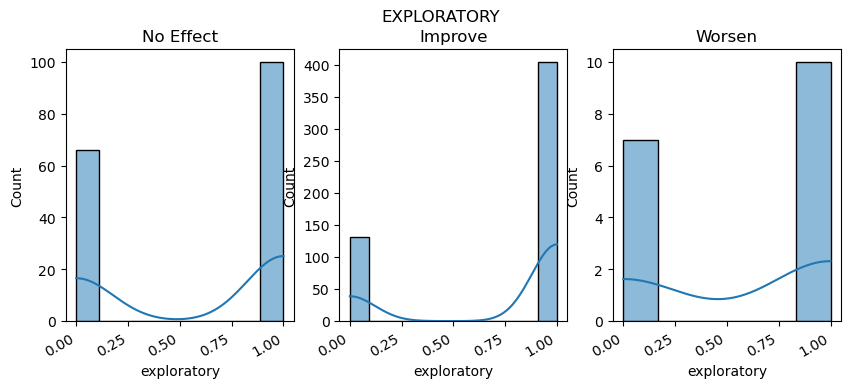

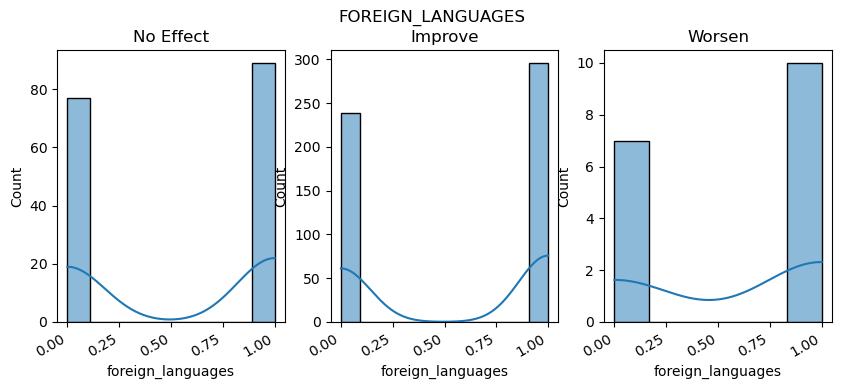

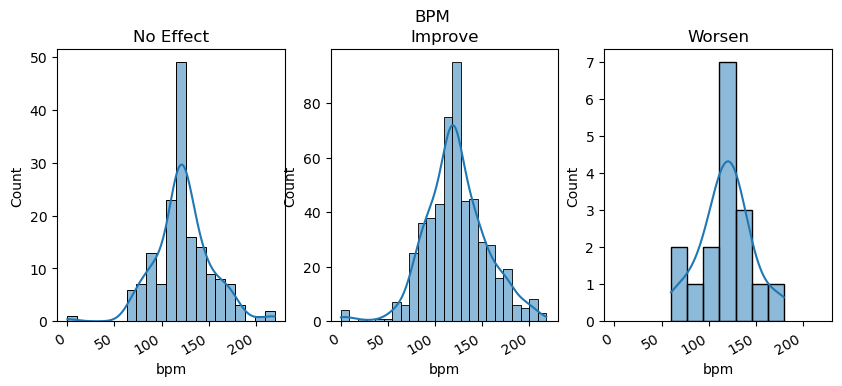

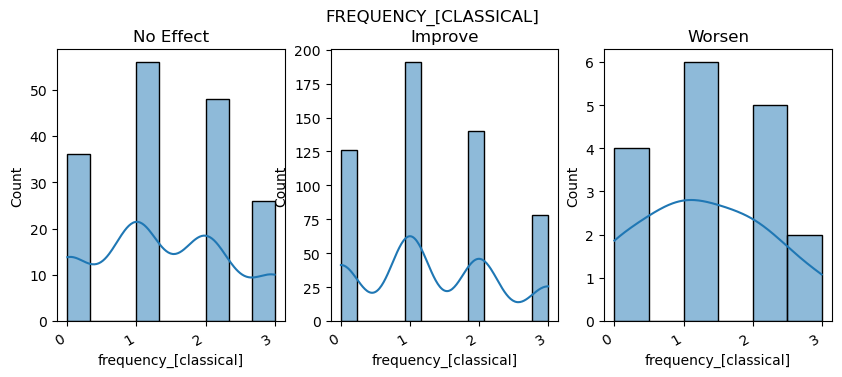

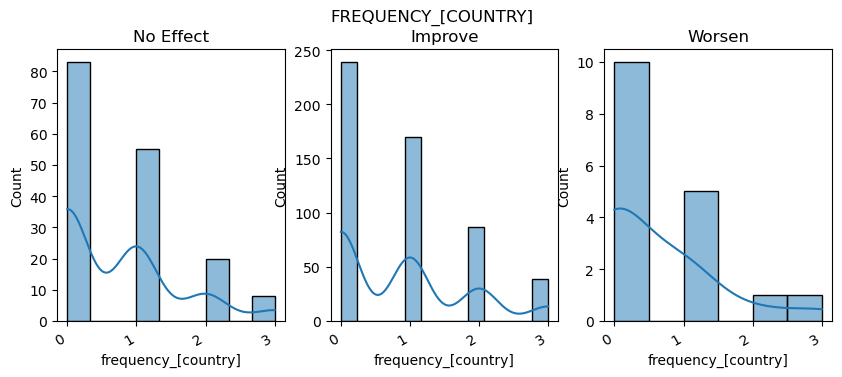

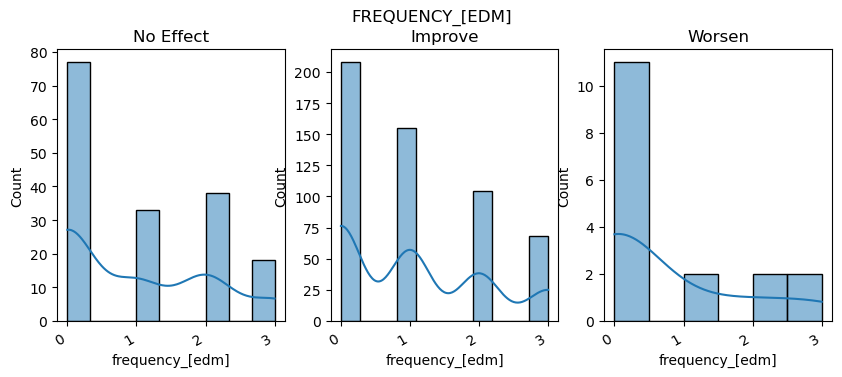

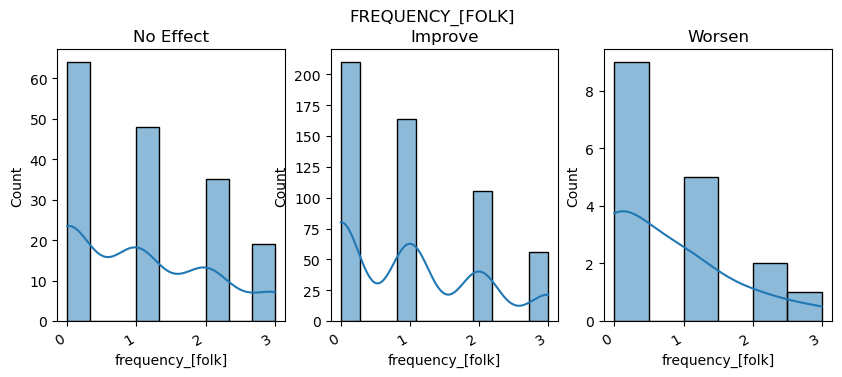

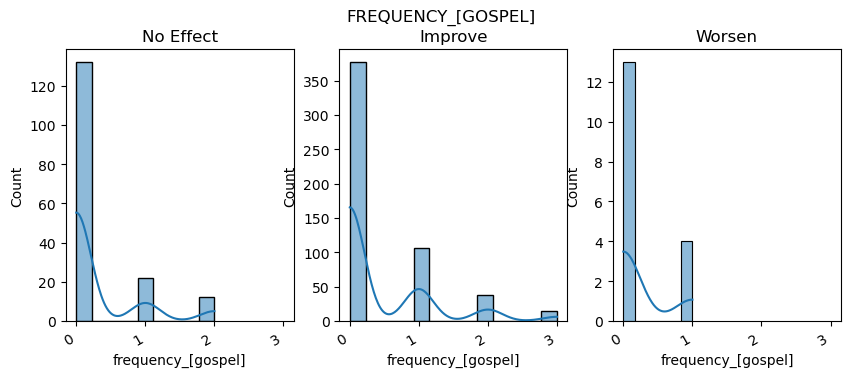

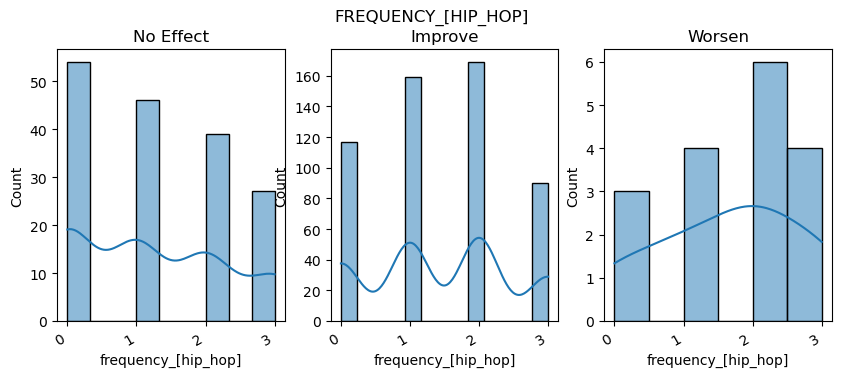

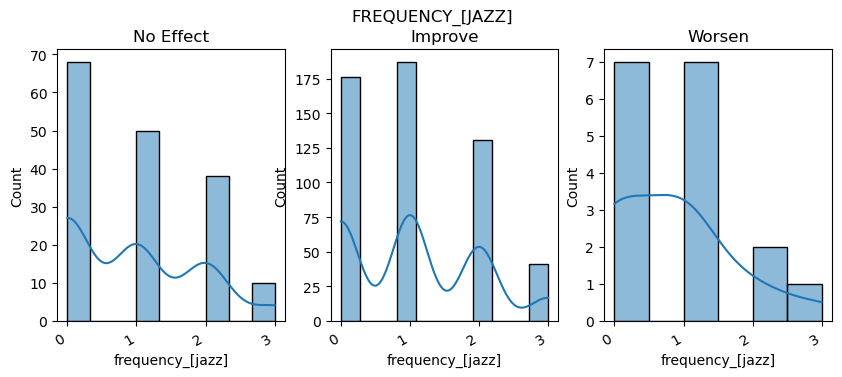

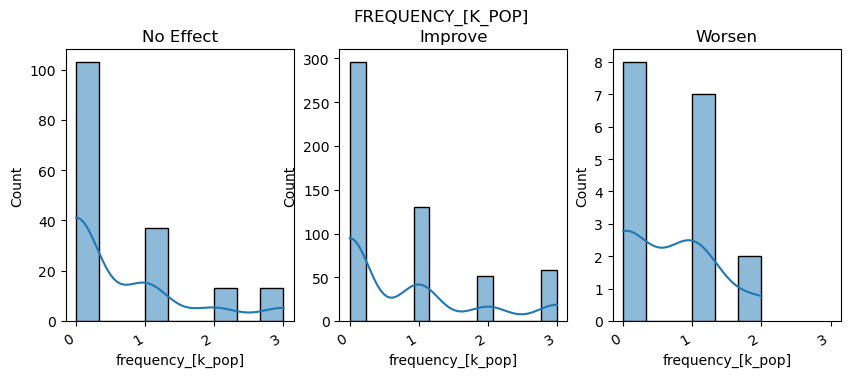

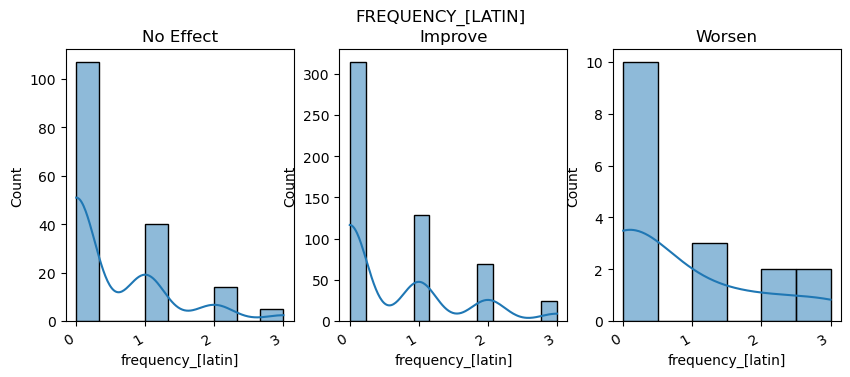

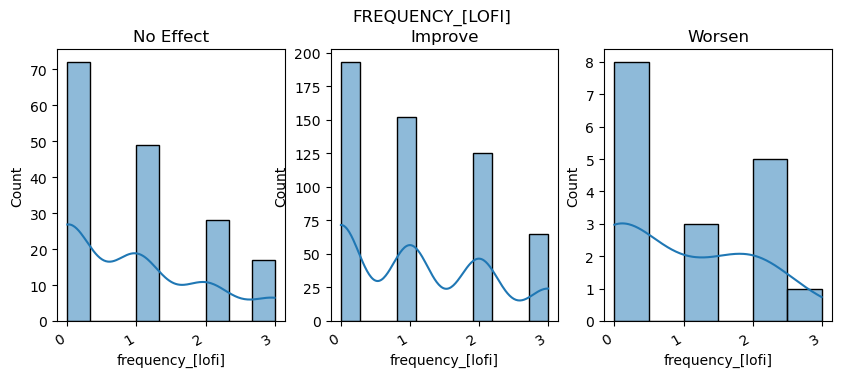

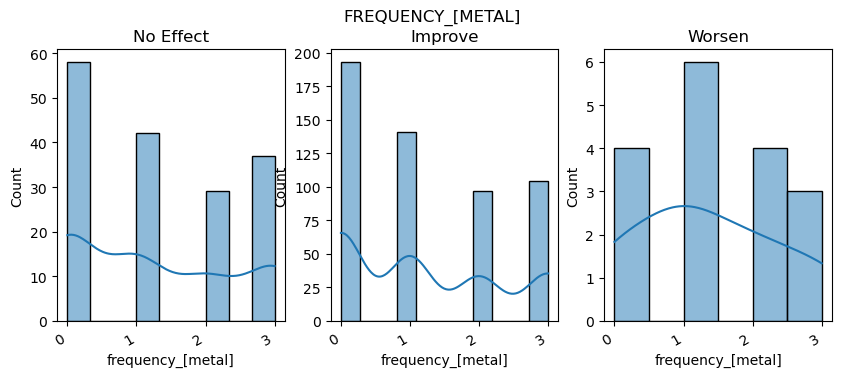

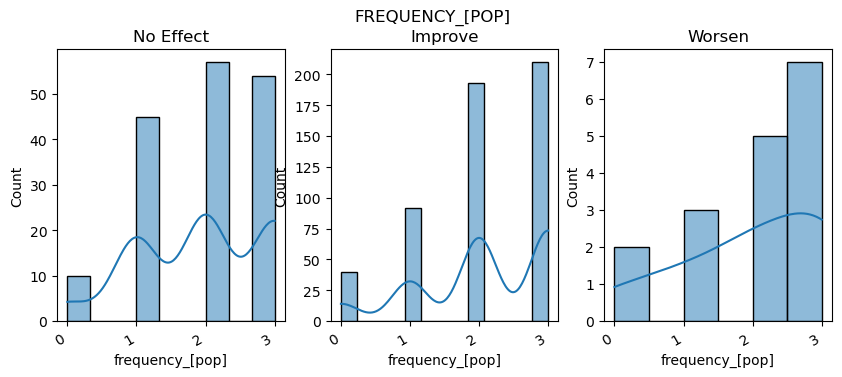

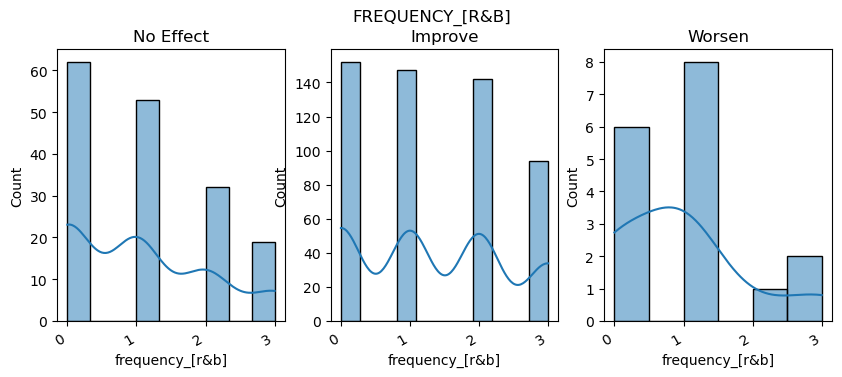

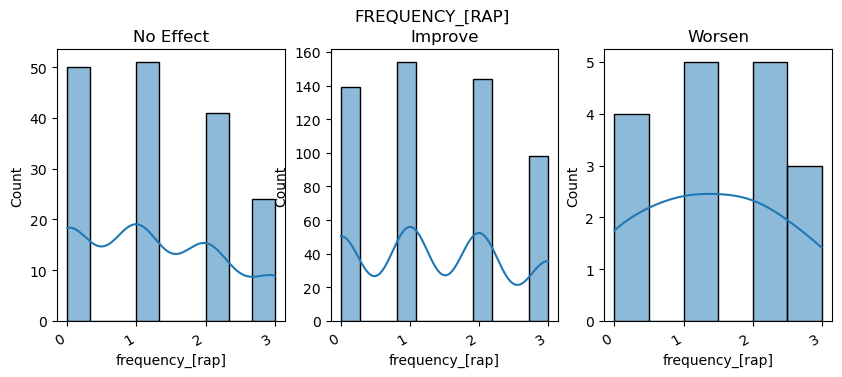

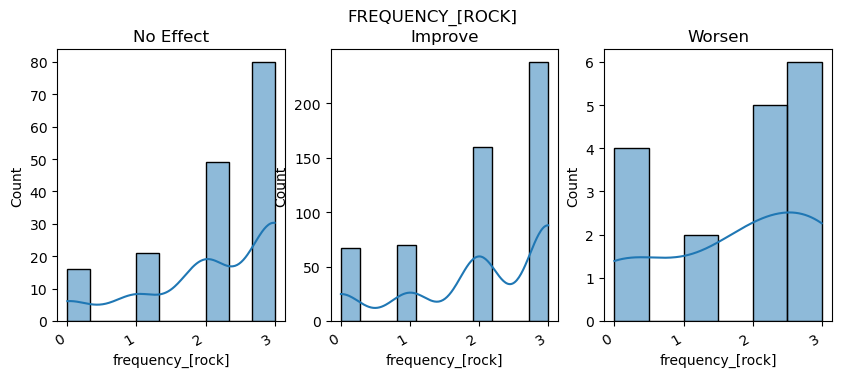

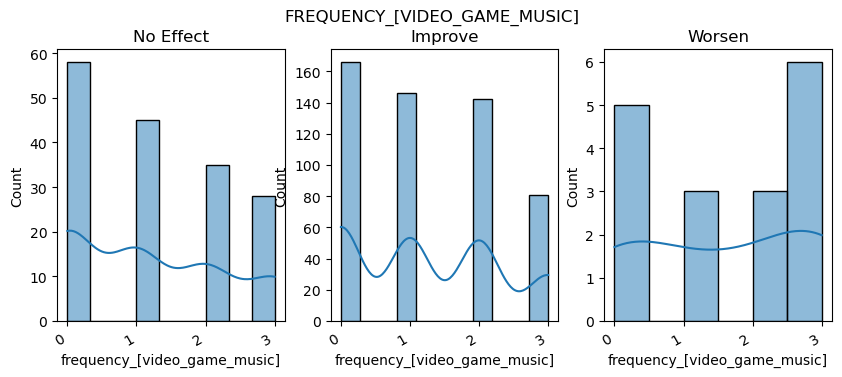

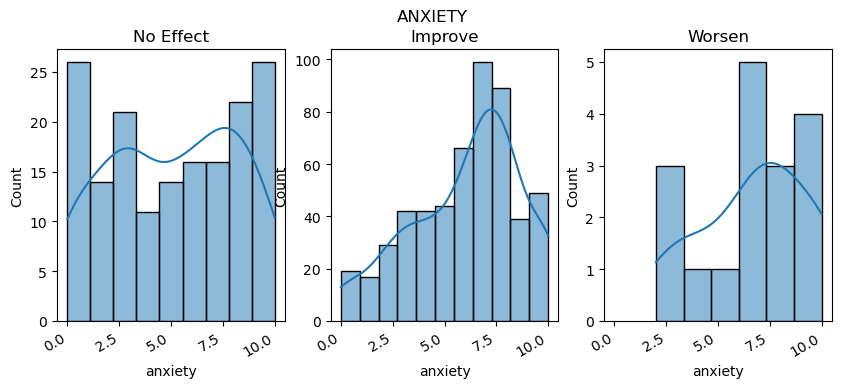

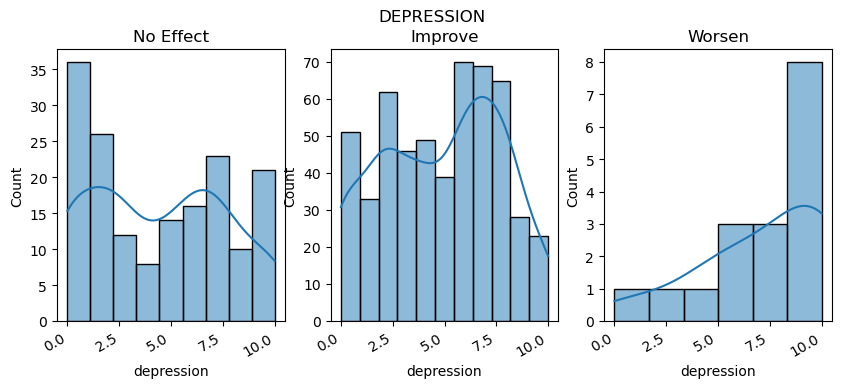

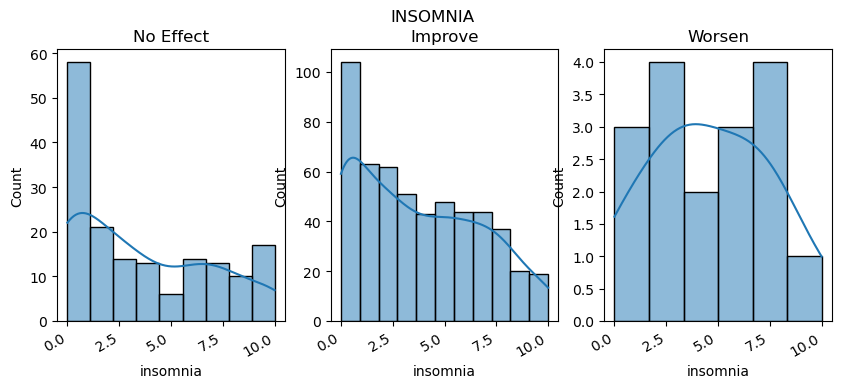

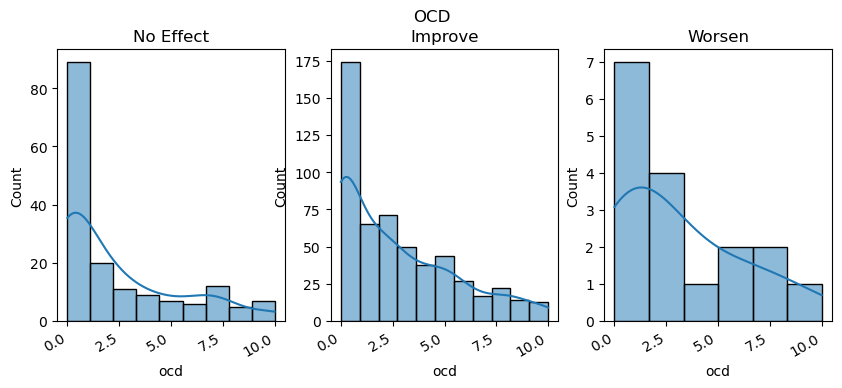

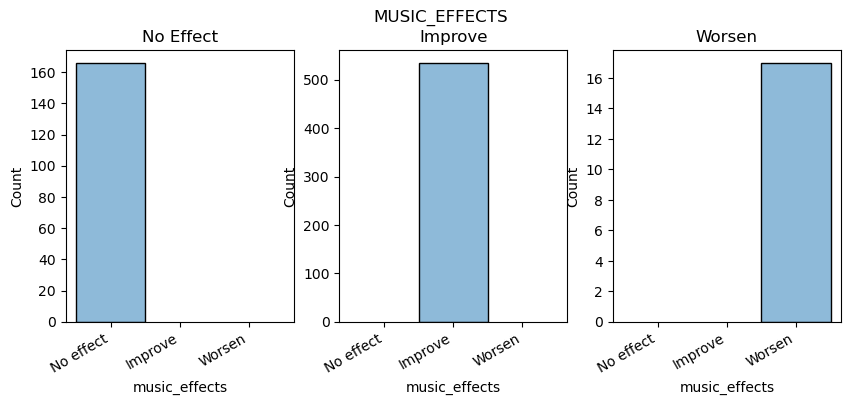

In [40]:
for col in df_mxmh.columns:
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,4), sharex=True)

    df_mxmh_noe = df_mxmh[df_mxmh['music_effects']=='No effect']
    sns.histplot(data=df_mxmh_noe, x=df_mxmh_noe[col], kde=True, bins='auto', ax=axs[0])
    axs[0].set_title('No Effect')

    df_mxmh_imp = df_mxmh[df_mxmh['music_effects']=='Improve']
    sns.histplot(data=df_mxmh_imp, x=df_mxmh_imp[col], kde=True, bins='auto', ax=axs[1])
    axs[1].set_title('Improve')

    df_mxmh_wor = df_mxmh[df_mxmh['music_effects']=='Worsen']
    sns.histplot(data=df_mxmh_wor, x=df_mxmh_wor[col], kde=True, bins='auto', ax=axs[2])
    axs[2].set_title('Worsen')

    fig.autofmt_xdate() #I love this helper function now

    plt.suptitle(f'{col.upper()}')
    plt.show()
    plt.close()

### Quick Observations:abs

- age
    - Majority of respondants are around 20
    - 
- primary_streaming_service
    - 
- hours_per_day
    - 
- while_working
    - 
- instrumentalist
    - 
- composer
    - 
- fav_genre
    - 
- exploratory
    - 
- foreign_languages
    - 
- bpm
    - 
- frequency_[classical]
    - 
- frequency_[country]
    - 
- frequency_[edm]
    - 
- frequency_[folk]
    - 
- frequency_[gospel]
    - 
- frequency_[hip_hop]
    - 
- frequency_[jazz]
    - 
- frequency_[k_pop]
    - 
- frequency_[latin]
    - 
- frequency_[lofi]
    - 
- frequency_[metal]
    - 
- frequency_[pop]
    - 
- frequency_[r&b]
    - 
- frequency_[rap]
    - 
- frequency_[rock]
    - 
- frequency_[video_game_music]
    - 
- anxiety
    - 
- depression
    - 
- insomnia
    - 
- ocd
    - 
- music_effects
    - 